In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [2]:
# 生成数据
# 样本量少于特征量，50样本，200个正
X = np.random.randn(50,200)
X

array([[ 0.10500576, -0.19080653,  0.6171205 , ..., -0.09660124,
         0.21407994,  0.4588742 ],
       [-0.25750282, -0.53848679, -1.10221888, ..., -1.36746236,
        -1.75438134,  0.36152381],
       [ 0.46012275, -0.83425602, -0.70395961, ..., -0.8981198 ,
        -1.96188606, -1.08694713],
       ...,
       [ 1.6614083 ,  0.14891454,  0.84006434, ..., -2.00309763,
        -0.60165032, -0.27577863],
       [-1.54849254, -0.52244865,  0.43176126, ..., -0.64397628,
        -1.68826371,  0.10986706],
       [-0.48407908, -2.14864674,  1.16158099, ...,  2.31145419,
        -0.2889496 ,  1.13833564]])

In [3]:
# Xw = y
w = np.random.randn(200)
# 随机选取190，让其为0
w

array([ 1.3931261 , -0.14979176,  0.96808954,  1.01831117,  0.16217091,
        0.20454711,  0.36265317, -0.42728699,  0.52972485, -0.80419127,
        0.10416495, -1.43543887,  0.18101485,  0.18243985, -0.66656612,
       -0.11752477, -0.06394828,  0.13003185,  0.94275274, -0.40524622,
       -1.33707261,  0.23126783,  0.85642035, -0.41299745,  0.29047526,
        0.31633791,  0.5049416 , -0.54706498, -0.70260625, -0.90291265,
       -1.33755664,  0.03716974, -0.12772009, -0.09210819,  0.64231242,
       -0.49167106, -0.12935378,  0.82878201,  0.50653057, -0.14560618,
        0.07691364,  1.04606688,  0.41274352, -0.27683851,  0.57022696,
       -0.6878763 , -0.0347303 ,  1.15281647,  0.54075984, -0.57347234,
        0.11865952,  1.54724025,  0.68610708, -1.23386591, -2.23071358,
        0.30847383,  0.47739606,  0.48846376, -0.37705637, -0.0221886 ,
        0.48181558, -0.14641608, -0.10887059,  0.17556973,  0.22733306,
       -0.24513253,  1.00520459,  1.2529714 ,  1.32537964,  0.67

In [4]:
index= np.arange(200)
index
np.random.shuffle(index)
index

array([167, 168, 136,  21,  26,  67,  36,  35, 129, 125,   2,  65, 151,
       102, 165,  14, 169, 104,  31, 162, 163, 146,  40,   5,  15,   8,
        92,  53, 192, 191, 189,  99, 148, 121,  45, 186,  11, 112,  93,
       198, 138, 152,  81,  72,   0,  83, 156, 119, 196, 150,  13, 181,
       154, 118, 128, 123,  57, 134,  12,  96,  87,  33,  73,  30,  78,
         1, 116, 194,  75,   9, 161, 188, 105,  51, 175,  44,  39, 195,
       132, 133,  54,  34, 101,  27,  56,  32, 182, 185, 166,  55, 155,
       126, 141, 106,  88,  68,  58, 193,  76, 199,  98, 174, 173,  42,
        94, 103, 113,  37,  38,  16,  28,  48,  60, 107,  22,  63, 131,
        64,  70, 190,  69, 122, 187, 147,  77, 120,  50,  62, 184,  82,
        66, 100,  74,   3,  95,  49, 142, 140, 197,  79,  71,  97,  25,
       145, 130, 176, 178,  43,  23, 179, 117, 108, 157,  46, 109, 183,
       171,  41, 115, 164, 127,  89,  19, 110,  85, 158, 149,  17,  80,
       180, 170, 135, 137, 114,  24,  84, 153, 159,   7, 160, 12

In [5]:
w[index[:190]] = 0
w

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.16217091,
        0.        ,  0.36265317,  0.        ,  0.        ,  0.        ,
        0.10416495,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -1.33707261,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.90291265,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.15281647,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.0221886 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [6]:
X.shape

(50, 200)

In [7]:
# y是目标值
#X.dot(w)返回的是(X,w)两个数组的点积(dot product)   
y = X.dot(w)
y

array([ 6.54932058e-01, -4.27059816e-01, -8.28245245e-01, -2.44843527e+00,
       -2.56173712e+00,  2.19109322e+00,  2.20981472e+00,  5.72698866e+00,
       -1.31999749e+00, -3.96657047e-01,  2.12980736e+00,  9.35421439e-01,
       -1.57155260e+00, -8.54981101e-01,  8.50558523e+00, -4.59772627e-01,
        4.03474257e-01, -3.43195301e+00,  5.47205979e-01, -1.87485935e+00,
        5.60122305e-01,  9.15879845e+00, -3.17050448e-01,  5.55057099e-01,
        8.89572913e-03,  3.21318675e+00, -1.45703164e+00,  5.43358923e+00,
        4.85773661e+00,  9.98759351e-01,  5.01464414e-01,  1.22614739e+00,
       -3.51539121e+00,  1.69417926e-02, -2.87844896e+00,  1.34853394e+00,
        9.80831190e-01, -6.55802342e-02, -7.42054414e-01,  2.99583288e+00,
        5.27574504e-01, -4.37018935e+00, -1.03822029e-01,  1.62098821e+00,
        2.64139551e+00, -5.63375961e-01,  1.05630208e+00, -8.80202493e-01,
        6.82944243e-01, -3.08375732e-01])

Text(0.5,1,'Lasso')

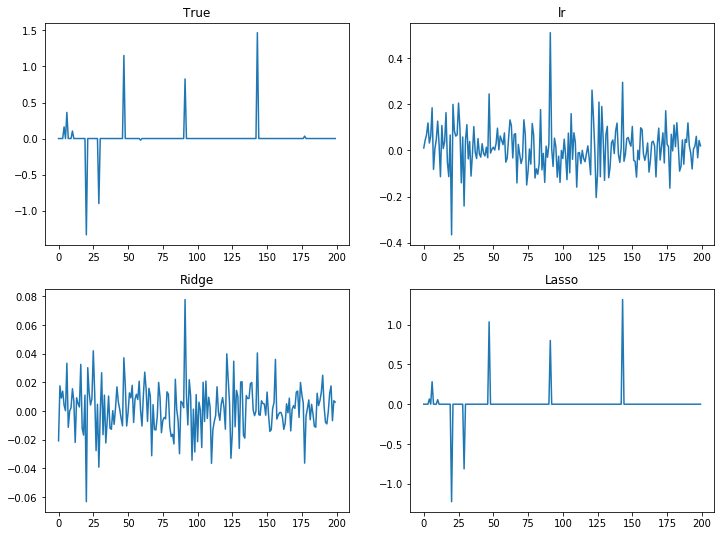

In [8]:
lr = LinearRegression(fit_intercept=False)

ridge = Ridge(alpha = 1000,fit_intercept=False)

lasso = Lasso(alpha=0.1,fit_intercept=False)


lr.fit(X,y)

ridge.fit(X,y)

lasso.fit(X,y)


lr_w = lr.coef_

ridge_w = ridge.coef_

lasso_w = lasso.coef_



# 四个子视图
plt.figure(figsize=(12,9))

ax = plt.subplot(2,2,1)
ax.plot(w)
ax.set_title('True')


ax = plt.subplot(2,2,2)
ax.plot(lr_w)
ax.set_title('lr')

ax = plt.subplot(2,2,3)
ax.plot(ridge_w)
ax.set_title('Ridge')

ax = plt.subplot(2,2,4)
ax.plot(lasso_w)
ax.set_title('Lasso')